<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/NeuralNetWithKeras_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import Perceptron
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

4431872/4422102 [==============================] - 0s 0us/step


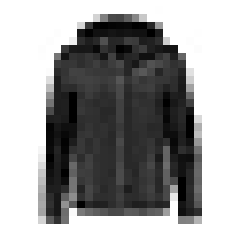

[0 1 2 3 4 5 6 7 8 9]


In [5]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

print(np.unique(y_train))
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

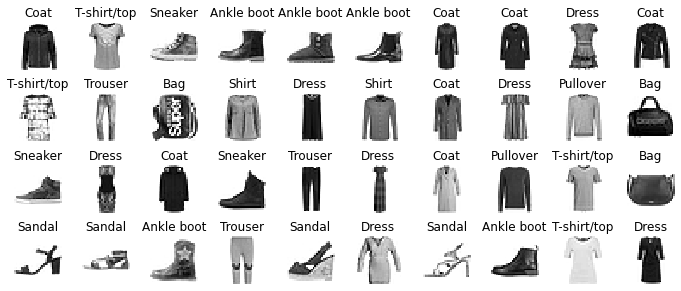

In [6]:
n_row = 4
n_col = 10

plt.figure(figsize=(n_col*1.2, n_row*1.2))
for row in range(n_row):
    for col in range(n_col):
        index = n_col * row + col
        plt.subplot(n_row, n_col, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


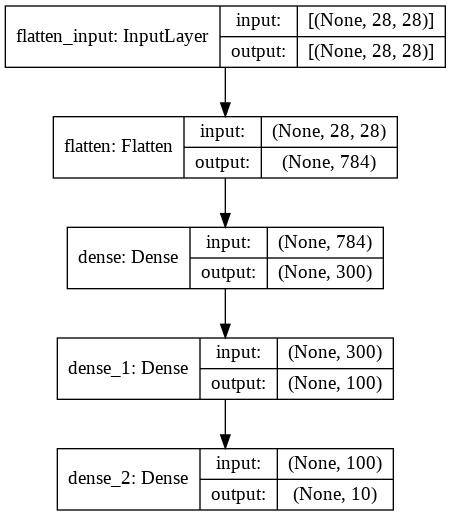

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

keras.utils.plot_model(model, show_shapes=True) 

In [8]:
hidden1 = model.layers[1]
weights, bias = model.get_layer(hidden1.name).get_weights()
print(hidden1.name)
print(weights.shape, bias.shape)

dense
(784, 300) (300,)


In [9]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])


In [10]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7012 - sparse_categorical_accuracy: 0.7732 - val_loss: 0.5319 - val_sparse_categorical_accuracy: 0.8174
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4857 - sparse_categorical_accuracy: 0.8306 - val_loss: 0.4314 - val_sparse_categorical_accuracy: 0.8552
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4426 - sparse_categorical_accuracy: 0.8446 - val_loss: 0.4135 - val_sparse_categorical_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4149 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.4087 - val_sparse_categorical_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3953 - sparse_categorical_accuracy: 0.8618 - val_loss: 0.3816 - val_sparse_categorical_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3793 - spars

In [13]:
print(history.params)
print(history.history.items())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
dict_items([('loss', [0.701178789138794, 0.4857458174228668, 0.44262635707855225, 0.4149263799190521, 0.39527642726898193, 0.3792708218097687, 0.3653213679790497, 0.3546750843524933, 0.34410518407821655, 0.3345189690589905, 0.326219379901886, 0.31802070140838623, 0.31141895055770874, 0.30431193113327026, 0.2976377010345459, 0.291813462972641, 0.2855601906776428, 0.28008514642715454, 0.2761191427707672, 0.27007076144218445, 0.2661048471927643, 0.26045307517051697, 0.2563629150390625, 0.2519393861293793, 0.2485378533601761, 0.2443440854549408, 0.23929135501384735, 0.23588581383228302, 0.23149414360523224, 0.22842364013195038]), ('sparse_categorical_accuracy', [0.7731817960739136, 0.8305636644363403, 0.8446363806724548, 0.8540909290313721, 0.8617818355560303, 0.8657272458076477, 0.8706181645393372, 0.8736909031867981, 0.876763641834259, 0.8802727460861206, 0.8839091062545776, 0.887072741985321, 0.8878727555274963, 0.8909090757369995, 0.892563641

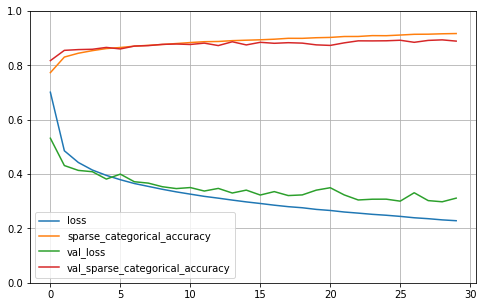

In [15]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3380 - sparse_categorical_accuracy: 0.8837


[0.3380371928215027, 0.8837000131607056]

In [19]:
#predict
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')